In [ ]:
# Input Format
# :  array[] = {3,1,2,5,3}
# Result
# : {3,4)
# Explanation
# : A = 3 , B = 4 
# Since 3 is appearing twice and 4 is missing

# Example 2:
# Input Format
# : array[] = {3,1,2,5,4,6,7,5}
# Result
# : {5,8)
# Explanation
# : A = 5 , B = 8 
# # Since 5 is appearing twice and 8 is missing

Brute Force

In [1]:
a = [3, 1, 2, 5, 4, 6, 7, 5]

In [12]:
from typing import List

def findMissingRepeatingNumbers(a: [int]) -> [int]:
    n = len(a)  # size of the array
    repeating, missing = -1, -1

    # Find the repeating and missing number:
    for i in range(1, n+1): # i need to find i= 1,2,3,4,5 .... i array
        # Count the occurrences:
        cnt = 0
        print(i)
        print("//")
        for j in range(n): # j index number of elements in array 0-n
            if a[j] == i: # if duplicate for more than 1 occurrence
                cnt += 1
            print(j)
        print("**")

        if cnt == 2:
            repeating = i # repeated number
        elif cnt == 0:
            missing = i # missing occurrence

        if repeating != -1 and missing != -1:
            break

    return [repeating, missing]

In [13]:
ans = findMissingRepeatingNumbers(a)
print("The repeating and missing numbers are: {", ans[0], ", ", ans[1], "}\n")



1
//
0
1
2
3
4
5
6
7
**
2
//
0
1
2
3
4
5
6
7
**
3
//
0
1
2
3
4
5
6
7
**
4
//
0
1
2
3
4
5
6
7
**
5
//
0
1
2
3
4
5
6
7
**
6
//
0
1
2
3
4
5
6
7
**
7
//
0
1
2
3
4
5
6
7
**
8
//
0
1
2
3
4
5
6
7
**
The repeating and missing numbers are: { 5 ,  8 }



Time Complexity: O(N2), where N = size of the given array.
Reason: Here, we are using nested loops to count occurrences of every element between 1 to N.

Space Complexity: O(1) as we are not using any extra space.

Hashing: 

In [14]:

from typing import List

def findMissingRepeatingNumbers(a: [int]) -> [int]:
    n = len(a) # size of the array
    hash = [0] * (n + 1) # hash array[0,0,0,0,0,..]

    #update the hash array:
    for i in range(n):
        hash[a[i]] += 1 # hash array contains number  and their frequencies [1,1,1,2...]

    #Find the repeating and missing number:
    repeating, missing = -1, -1
    for i in range(1, n + 1):
        if hash[i] == 2:
            repeating = i
        elif hash[i] == 0:
            missing = i

        if repeating != -1 and missing != -1:
            break
    return [repeating, missing]


In [16]:
a = [3, 1, 2, 5, 4, 6, 7, 5]
ans = findMissingRepeatingNumbers(a)
print("The repeating and missing numbers are: {", ans[0], ", ", ans[1], "}\n")

The repeating and missing numbers are: { 5 ,  8 }



Time Complexity: O(2N), where N = the size of the given array.
Reason: We are using two loops each running for N times. So, the time complexity will be O(2N).

Space Complexity: O(N) as we are using a hash array to solve this problem.

optimal 1:

summation of the first N numbers is:
Sn = (N*(N+1))/2

S = the summation of all the elements in the given array.

Therefore, S - Sn = X - Y…………………equation 1

we know the summation of squares of the first N numbers is:

S2n = (N*(N+1)*(2N+1))/6

S2 = the summation of squares of all the elements in the given array.

Therefore, S2-S2n = X2-Y2...................equation 2

X+Y = (S2 - S2n) / (X-Y) [From equation 1, we get the value X-Y] ………… equation 3

In [17]:
from typing import List

def findMissingRepeatingNumbers(a: [int]) -> [int]:
    n = len(a)  # size of the array

    # Find Sn and S2n:
    SN = (n * (n + 1)) // 2
    S2N = (n * (n + 1) * (2 * n + 1)) // 6

    # Calculate S and S2:
    S, S2 = 0, 0
    for i in range(n):
        S += a[i]
        S2 += a[i] * a[i]

    # S-Sn = X-Y:
    val1 = S - SN

    # S2-S2n = X^2-Y^2:
    val2 = S2 - S2N

    # Find X+Y = (X^2-Y^2)/(X-Y):
    val2 = val2 // val1

    # Find X and Y: X = ((X+Y)+(X-Y))/2 and Y = X-(X-Y),
    # Here, X-Y = val1 and X+Y = val2:
    x = (val1 + val2) // 2
    y = x - val1

    return [x, y]


In [18]:
a = [3, 1, 2, 5, 4, 6, 7, 5]
ans = findMissingRepeatingNumbers(a)
print("The repeating and missing numbers are: {", ans[0], ", ", ans[1], "}\n")

The repeating and missing numbers are: { 5 ,  8 }



Time Complexity: O(N), where N = the size of the given array.
Reason: We are using only one loop running for N times. So, the time complexity will be O(N).

Space Complexity: O(1) as we are not using any extra space to solve this problem.

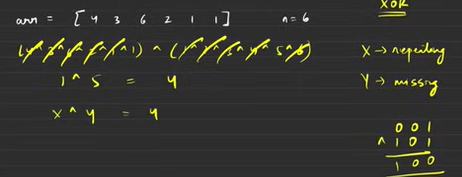

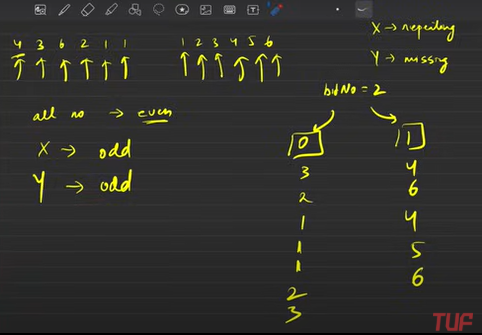

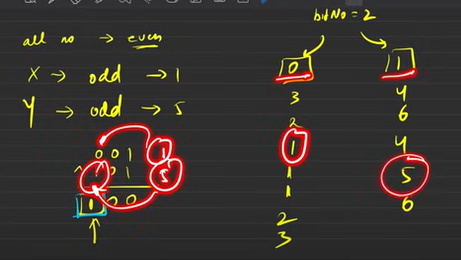

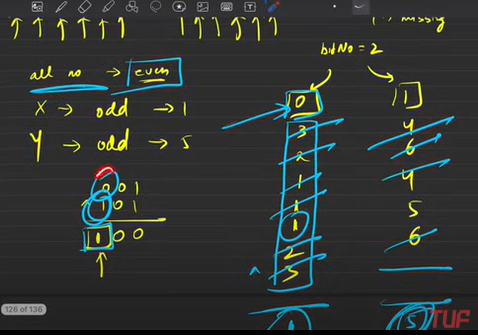

In [19]:
from typing import List

def findMissingRepeatingNumbers(a: [int]) -> [int]:
    n = len(a) # size of the array

    xr = 0

    #Step 1: Find XOR of all elements:
    for i in range(n):
        xr = xr ^ a[i]
        xr = xr ^ (i + 1)

    #Step 2: Find the differentiating bit number:
    # The function then finds the rightmost set bit in the XOR result xr. This is done using the bitwise AND operator 
    # & and the bitwise NOT operator ~.
    number = (xr & ~(xr - 1))

    #Step 3: Group the numbers:
    # The function then groups the numbers in the array a and the numbers from 1 to n into two groups based on the 
    # presence of the differentiating bit. The XOR of each group is calculated.
    zero = 0
    one = 0
    for i in range(n):
        #part of 1 group:
        if ((a[i] & number) != 0):
            one = one ^ a[i]
        #part of 0 group:
        else:
            zero = zero ^ a[i]

    for i in range(1, n + 1):
        #part of 1 group:
        if ((i & number) != 0):
            one = one ^ i
        #part of 0 group:
        else:
            zero = zero ^ i

    # Last step: Identify the numbers:
    # The function then identifies the missing and repeating numbers by checking which group has two numbers from the array 
    # a. The function returns the two numbers.
    cnt = 0
    for i in range(n):
        if (a[i] == zero):
            cnt += 1

    if (cnt == 2):
        return [zero, one]
    return [one, zero]

In [20]:
a = [3, 1, 2, 5, 4, 6, 7, 5]
ans = findMissingRepeatingNumbers(a)
print("The repeating and missing numbers are: {", ans[0], ", ", ans[1], "}\n") 

The repeating and missing numbers are: { 5 ,  8 }

